# Data Science and Business Analytics Internship

# # THE SPARK FOUNDATION 

# Name : Sannidhya Das

# Batch : GRIPNOVEMBER23

# Task 4 : Exploratory Data Analysis - Global Terrorism

Preface: Terrorist Activities Around The World

1. According to a survey, about 218 million people are affected by calamities, natural and man-made, per annum and about 68000 people loose their lives every year. The frequency of natural disasters like earthquakes, volcanoes, etc have remained broadly constant, but the number of terrorist activities have grown over the period.
2. The aim of this notebook is to explore the terrorist events around the world. Interactive Plots and Animations are used in this notebook, for making the exploration easy and more informative.  Some things that we will explore are the trends in terrorism over the year, the terrorism prone areas, etc. Since it is a geographic dataset, you will see a lot of geomaps.

Objectives:
● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

● As a Security/Defense Analyst, try to find out the hot zone of terrorism.

● What all security issues and insights you can derive by EDA?

![title](maxresdefault.jpg)

Importing Required Libraries 

In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go


import math
import warnings
warnings.filterwarnings('ignore')

In [32]:
pip install --upgrade matplotlib

Note: you may need to restart the kernel to use updated packages.


Loading Dataset:

In [33]:
terror = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

Printing first five rows of the dataframe:

In [34]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Exploratory Data Analysis (EDA):
Checking shape of dataframe:

In [35]:
terror.shape

(181691, 135)

Checking name of columns in dataframe:

In [36]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Renaming column names for our simplicity:

In [37]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

Selecting relevant columns only for further processing:

In [38]:
terror=terror[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

Checking dataframe again:

In [39]:
terror.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


Checking shape of dataset again :

In [40]:
terror.shape

(181691, 18)

Checking column names again:

In [41]:
terror.columns

Index(['Year', 'Month', 'Day', 'Country', 'state', 'Region', 'city',
       'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target',
       'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

Checking the null values in dataset:

In [42]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

Checking Datatype of each column:

In [43]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

# Most affected places in the world:

In [44]:
print("Country with the most attacks:",terror['Country'].value_counts().idxmax())
print("City with the most attacks:",terror['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",terror['Region'].value_counts().idxmax())
print("Year with the most attacks:",terror['Year'].value_counts().idxmax())
print("Month with the most attacks:",terror['Month'].value_counts().idxmax())
print("Group with the most attacks:",terror['Group'].value_counts().index[1])
print("Most Attack Types:",terror['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


# Year Wise Terror Attacks:

In [45]:
terror['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

# Data Visualization:

Number of Terrorist Activities Each Year:

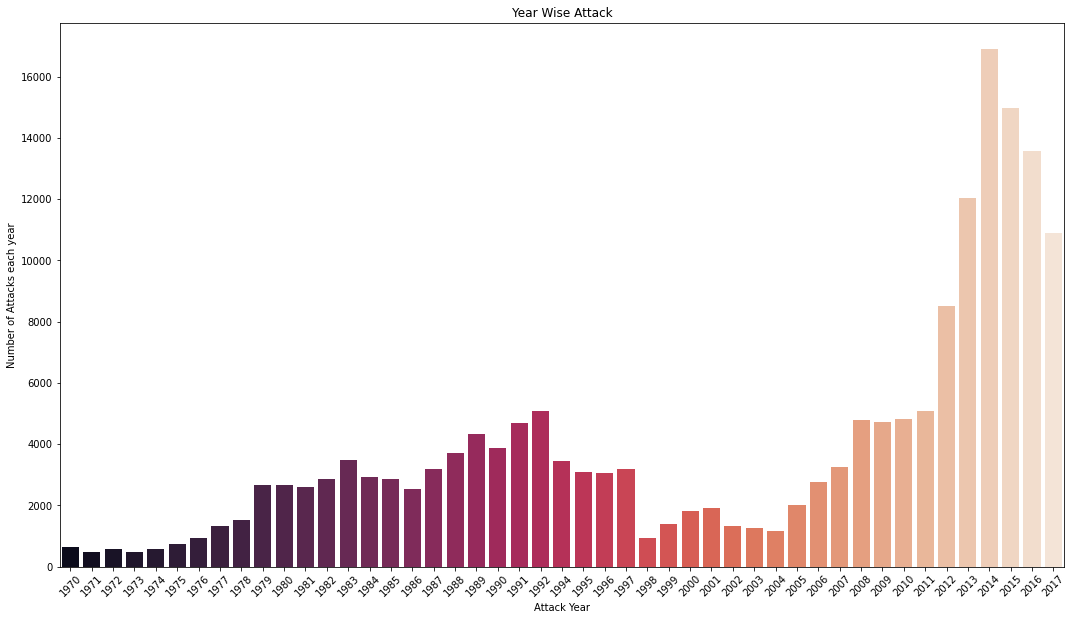

In [46]:
x_year = terror['Year'].unique()
y_count_years = terror['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Year Wise Attack')
plt.show()

Regionwise Terrorist Activities in Each Year Through Area Plot:

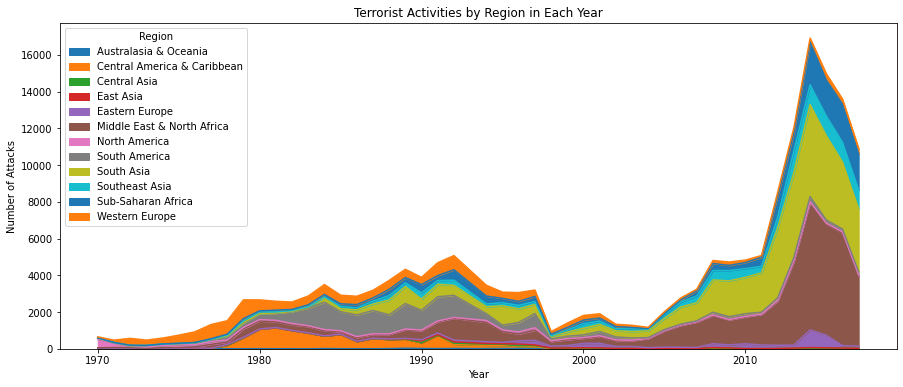

In [47]:
pd.crosstab(terror.Year, terror.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in Each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [48]:
terror['Wounded'] = terror['Wounded'].fillna(0).astype(int)
terror['Killed'] = terror['Killed'].fillna(0).astype(int)
terror['casualities'] = terror['Killed'] + terror['Wounded']

Top 40 Worst Terror Attacks as to Keep the Heatmap Simple and Easy to Visualize:

In [49]:
terror1 = terror.sort_values(by='casualities',ascending=False)[:40]

In [50]:
heat=terror1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)
heat.head()

Year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Top 40 Worst Terror Attacks in History from 1982 to 2016:

In [51]:
# Importing Some Necessary Libraries:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

Get the top 15 countries and their counts

In [52]:
top_countries = terror['Country'].value_counts()[:15]
top_countries

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

Top 15 Countries Affected by Terror Attacks:

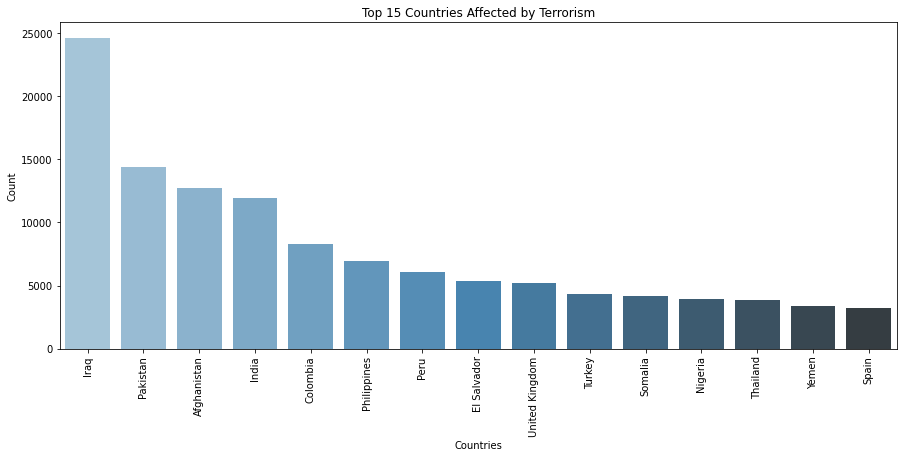

In [53]:
# Createing a DataFrame from the top_countries series
top_countries_df = pd.DataFrame({'Country': top_countries.index, 'Count': top_countries.values})

# Createing the barplot
plt.subplots(figsize=(15, 6))
sns.barplot(x='Country', y='Count', data=top_countries_df, palette='Blues_d')
plt.title('Top 15 Countries Affected by Terrorism')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Terrorist Attacks of a Particular year and their Locations:

Terrorist acts in the world over a certain year.

In [54]:
filterYear = terror['Year'] == 1970
filterData = terror[filterYear] # Filter data
reqFilterData = filterData.loc[:,'city':'longitude'] 
reqFilterData = reqFilterData.dropna() # Drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()


# Import Map visualization library:
import folium
from folium.plugins import MarkerCluster

# Createing a map centered at coordinates (0, 30) with specified tiles and zoom level
map = folium.Map(location=[0, 30], tiles='CartoDB Positron', zoom_start=2)

# Createing a MarkerCluster to group markers
marker_cluster = MarkerCluster().add_to(map)

for data_point in reqFilterDataList:
    name = data_point[0]
    latitude = data_point[1]
    longitude = data_point[2]

    # Createing a marker for each data point
    folium.Marker(
        location=[latitude, longitude],
        popup=name  # Display the name as a popup when the marker is clicked
    ).add_to(marker_cluster)

# Displaying the map
map

# Observation:
1. 84% of the terrorist attacks in 1970 were carried out on the American continent.
2. In 1970, the Middle East and North Africa, currently the center of wars and terrorist attacks, faced only one terrorist attack.**

# Terrorist Organizations that have Carried Out the Most Attacks:
Note: Indexing from 1 as to negate the value of 'Unknown'

In [55]:
terror.Group.value_counts()[1:15]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: Group, dtype: int64

In [56]:
test = terror[terror.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]
test.Country.unique()
                                

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico',
       'Afghanistan', 'Pakistan', 'Syria', 'Iraq', 'Turkey', 'Tunisia',
       'Lebanon', 'Turkmenistan', 'Israel', 'Belgium', 'Egypt', 'Libya',
       'Saudi Arabia', 'West Bank and Gaza Strip', 'France', 'Bahrain',
       'Jordan', 'Somalia', 'Germany', 'Yemen', 'Philippines', 'Malaysia',
       'Indonesia', 'Russia', 'Georgia', 'United Kingdom', 'Iran',
       'Australia'], dtype=object)

In [57]:
terror_df_group = terror.dropna(subset=['latitude','longitude'])
terror_df_group = terror.dropna(subset=['latitude','longitude'])

In [58]:
terrorist_groups = terror.Group.value_counts()[1:8].index.tolist()
terror_df_group = terror_df_group.loc[terror_df_group.Group.isin(terrorist_groups)]
print(terror_df_group.Group.unique())

["New People's Army (NPA)" 'Irish Republican Army (IRA)'
 'Shining Path (SL)' 'Farabundo Marti National Liberation Front (FMLN)'
 'Taliban' 'Al-Shabaab' 'Islamic State of Iraq and the Levant (ISIL)']


In [63]:
terror.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0


Total Number of People Killed in Terror Attack:

In [64]:
killData = terror.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna()))) # drop the NaN values

Number of people killed by terror attack: 411868


Types of Attacks that Caused Deaths:

In [65]:
attackData = terror.loc[:,'AttackType']
typeKillData = pd.concat([attackData, killData], axis=1)
typeKillData.head()

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [66]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297,24920,157321,3642,3718,4478,24231,880,32381


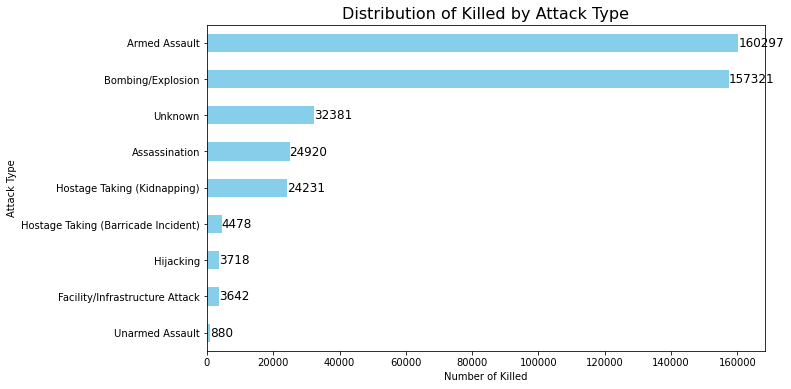

In [67]:
import matplotlib.pyplot as plt

# Assuming we have a DataFrame named killData with columns AttackType and Killed

# Group the data by AttackType and sum the number of Killed for each AttackType
attack_type_counts = typeKillData.groupby('AttackType')['Killed'].sum()

# Createing a horizontal bar graph
plt.figure(figsize=(10, 6))
ax = attack_type_counts.sort_values(ascending=False).plot(kind='barh', color='skyblue')
plt.title('Distribution of Killed by Attack Type', fontsize=16)
plt.xlabel('Number of Killed')
plt.ylabel('Attack Type')
plt.gca().invert_yaxis()  # Inverting the y-axis to display the highest count at the top

# Adding labels with the number of killed on each bar
for i, v in enumerate(attack_type_counts.sort_values(ascending=False)):
    ax.text(v + 3, i, str(v), color='black', va='center', fontsize=12)

# Displaying the chart
plt.show()

# Observation:
1. Armed assault and bombing/explosion are seen to be the cause of 77% of the deaths in these attacks. This rate is why these attacks are used so many times in terrorist actions.
2. This is how dangerous weapons and explosives are to the world.

In [68]:
terror.head(3)

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1


Number of People Killed in Terrorist Attacks by Countries:

In [69]:
countryData = terror.loc[:,'Country']
countryKillData = pd.concat([countryData, killData], axis=1)
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384,42,11066,0,3043,0,490,37,23,30,...,1,0,1500,97,1,8776,119,324,70,154


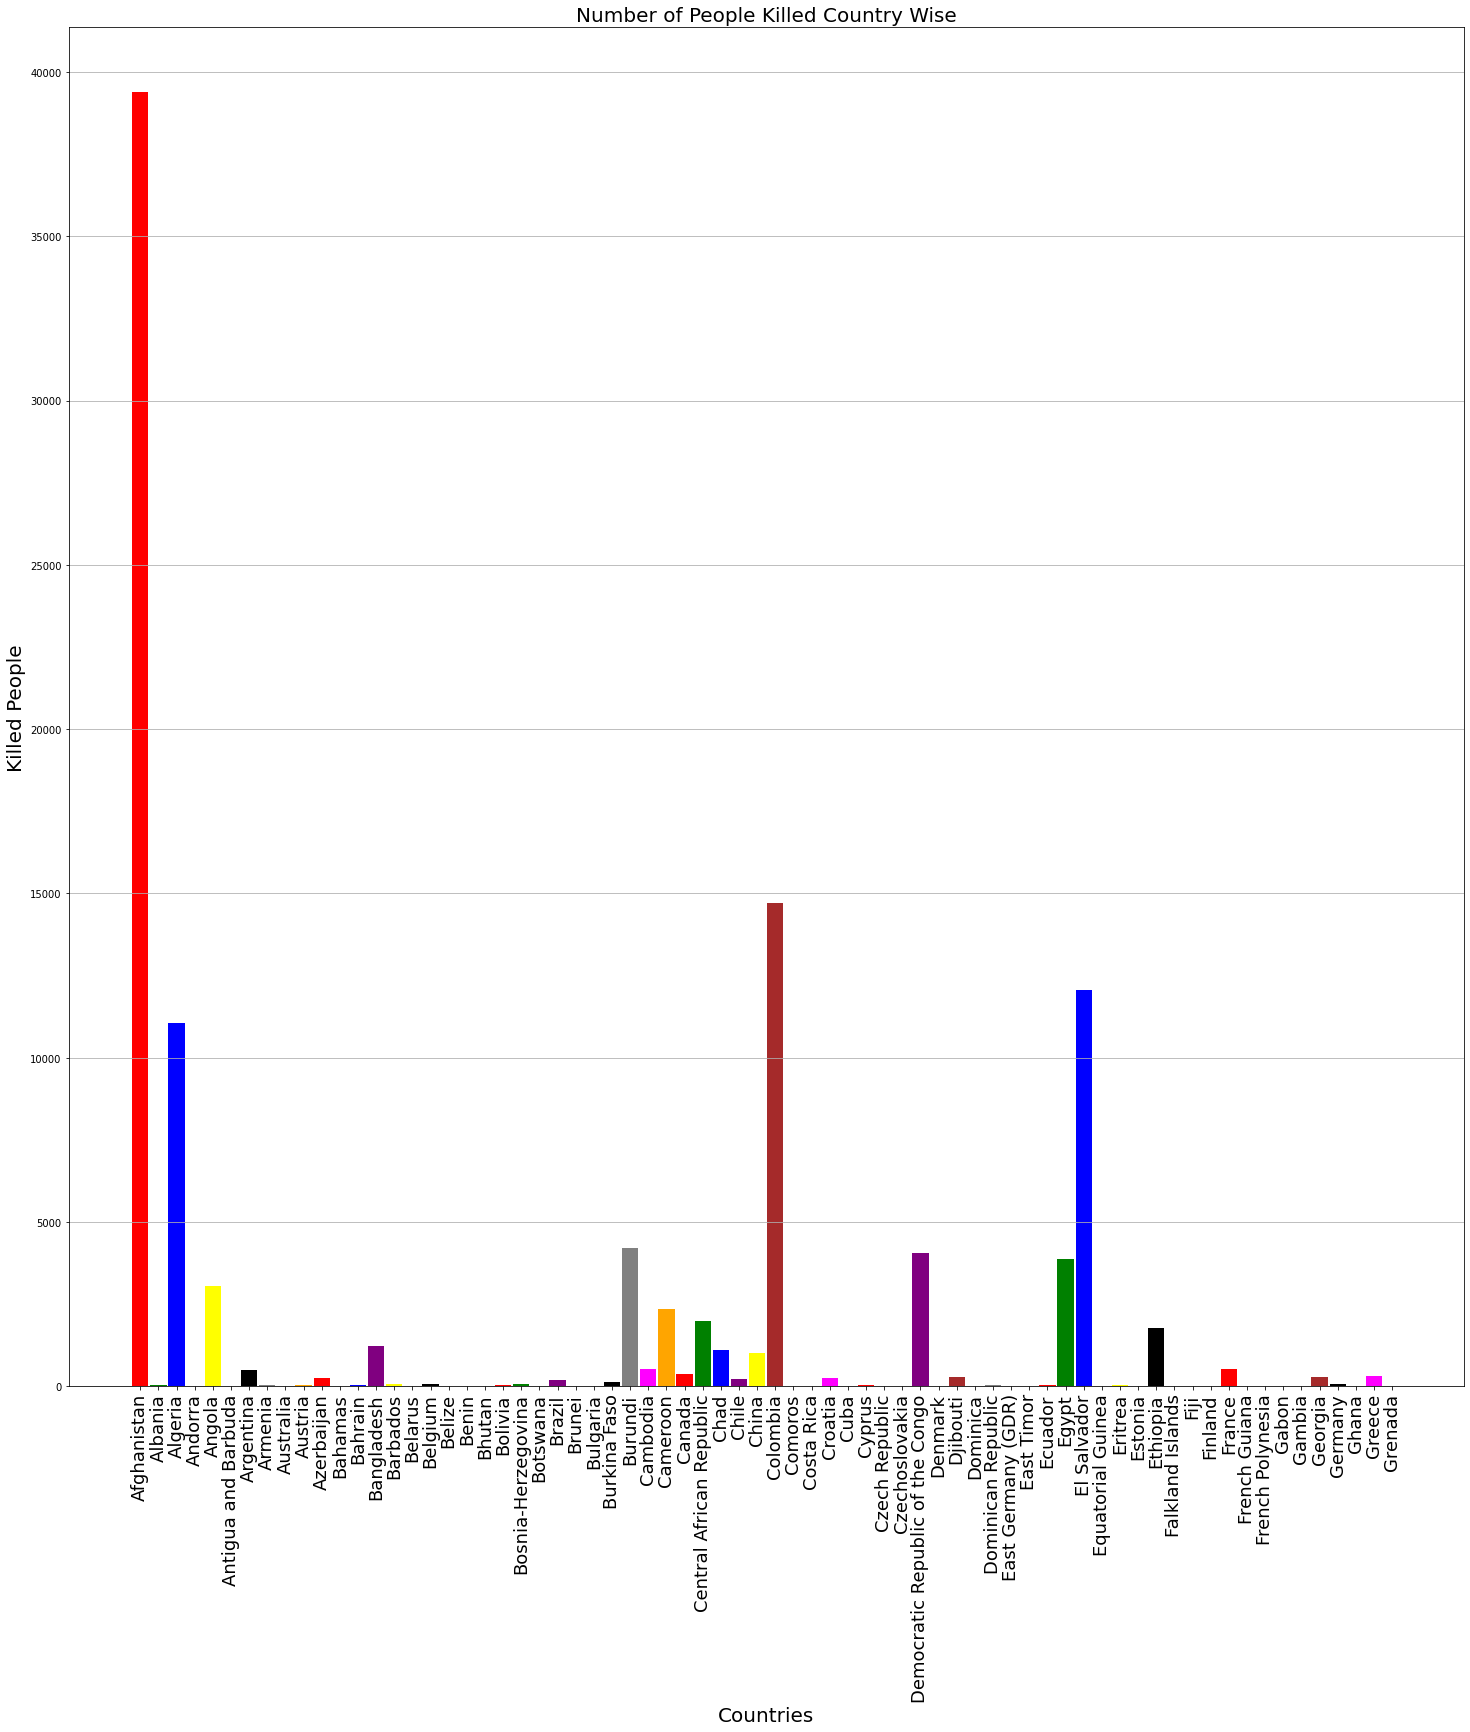

In [75]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size


labels = countryKillFormatData.columns.tolist()
labels = labels[:70] # 70 bar provides nice view. (Basically I divided all the countries into three graphs for better view and gives clarity in understanding)
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:70]
values = [int(i[0]) for i in values] # Convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # Color list for bar chart bar color 

fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25

plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of People Killed Country Wise', fontsize = 20)
plt.show()

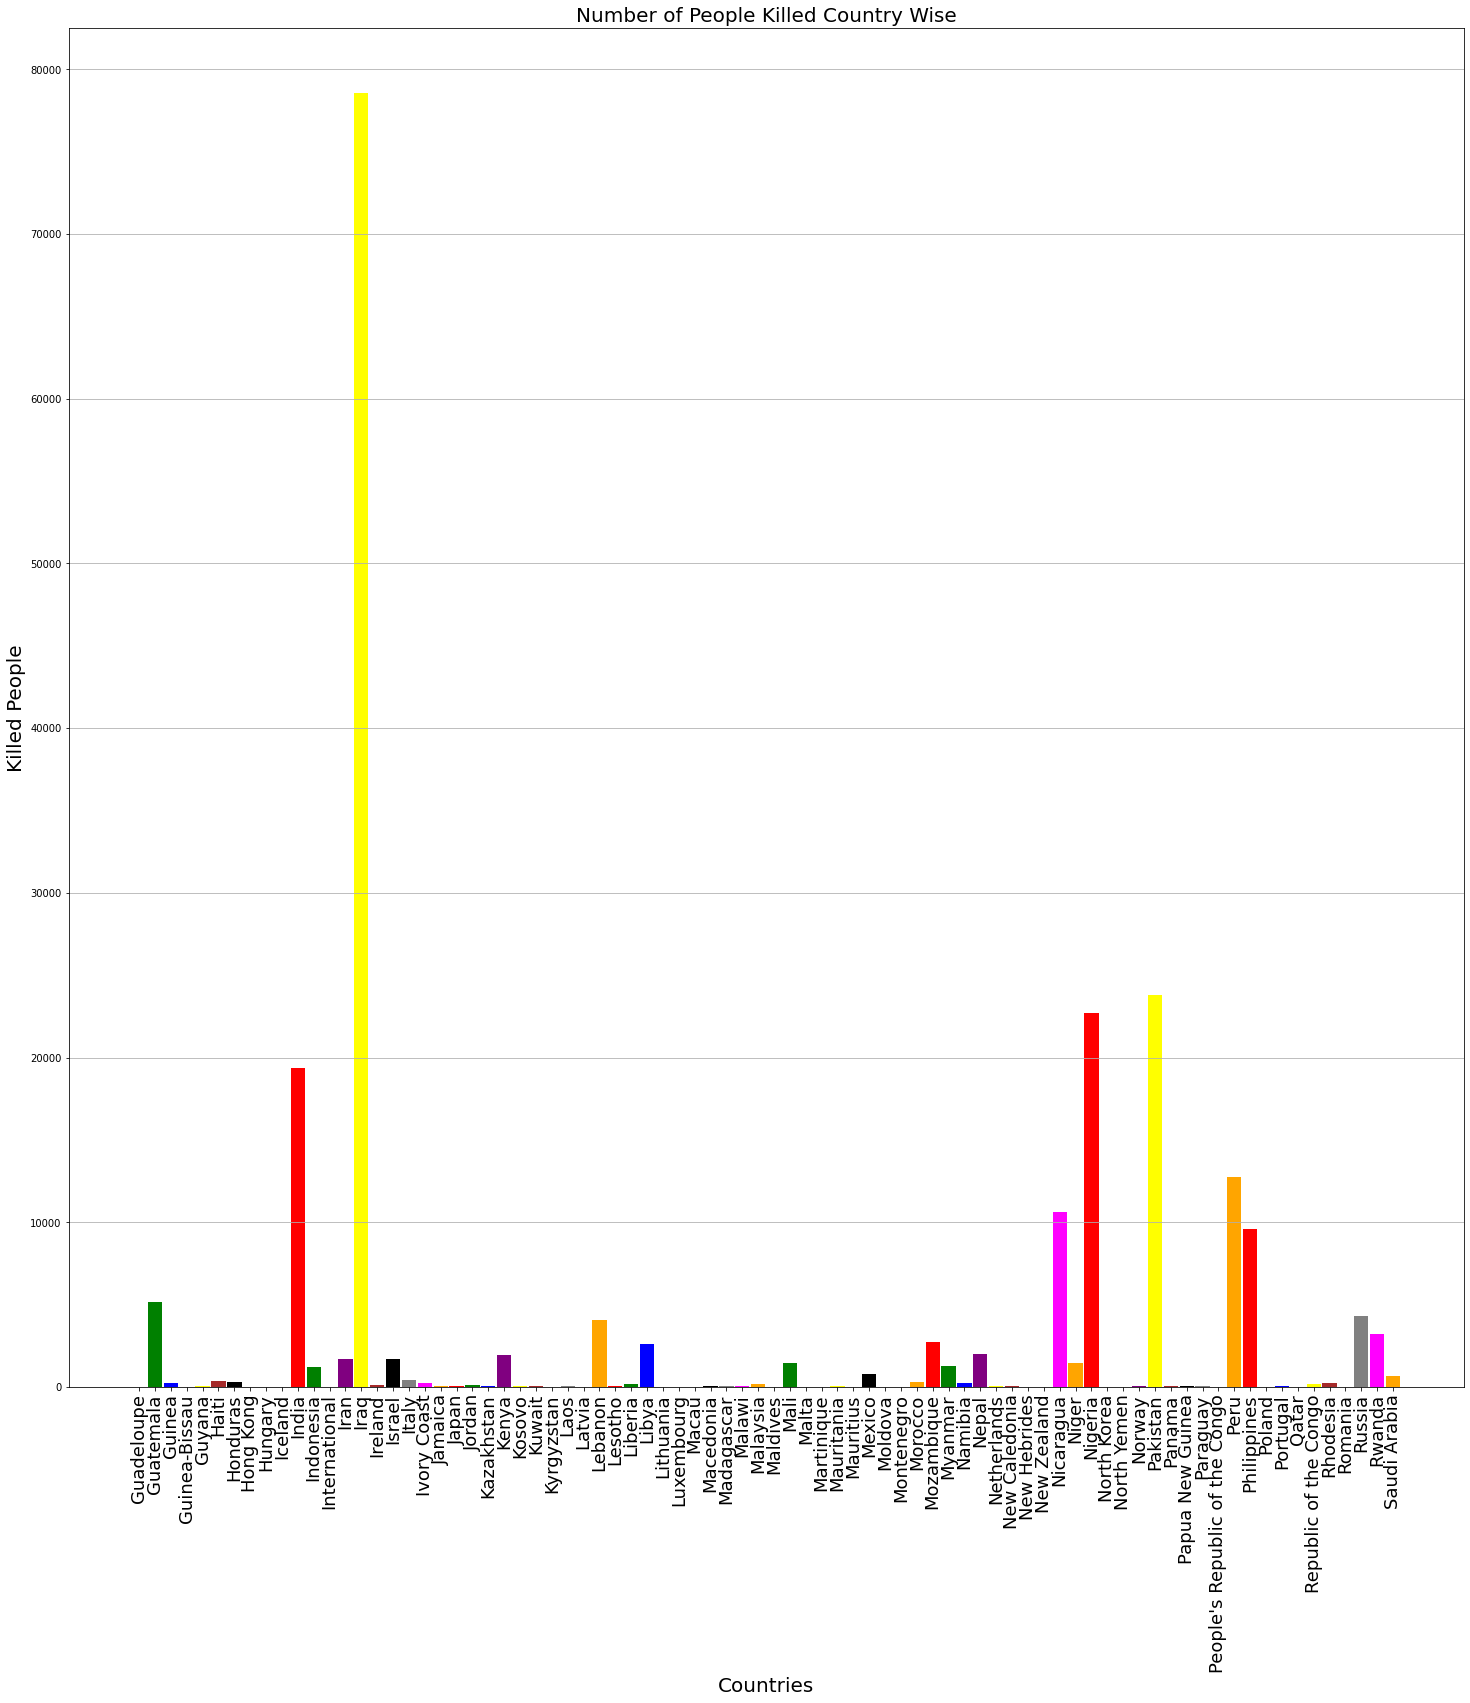

In [76]:
labels = countryKillFormatData.columns.tolist()
labels = labels[70:150]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[70:150]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']

fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20

plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of People Killed Country Wise', fontsize = 20)
plt.show()

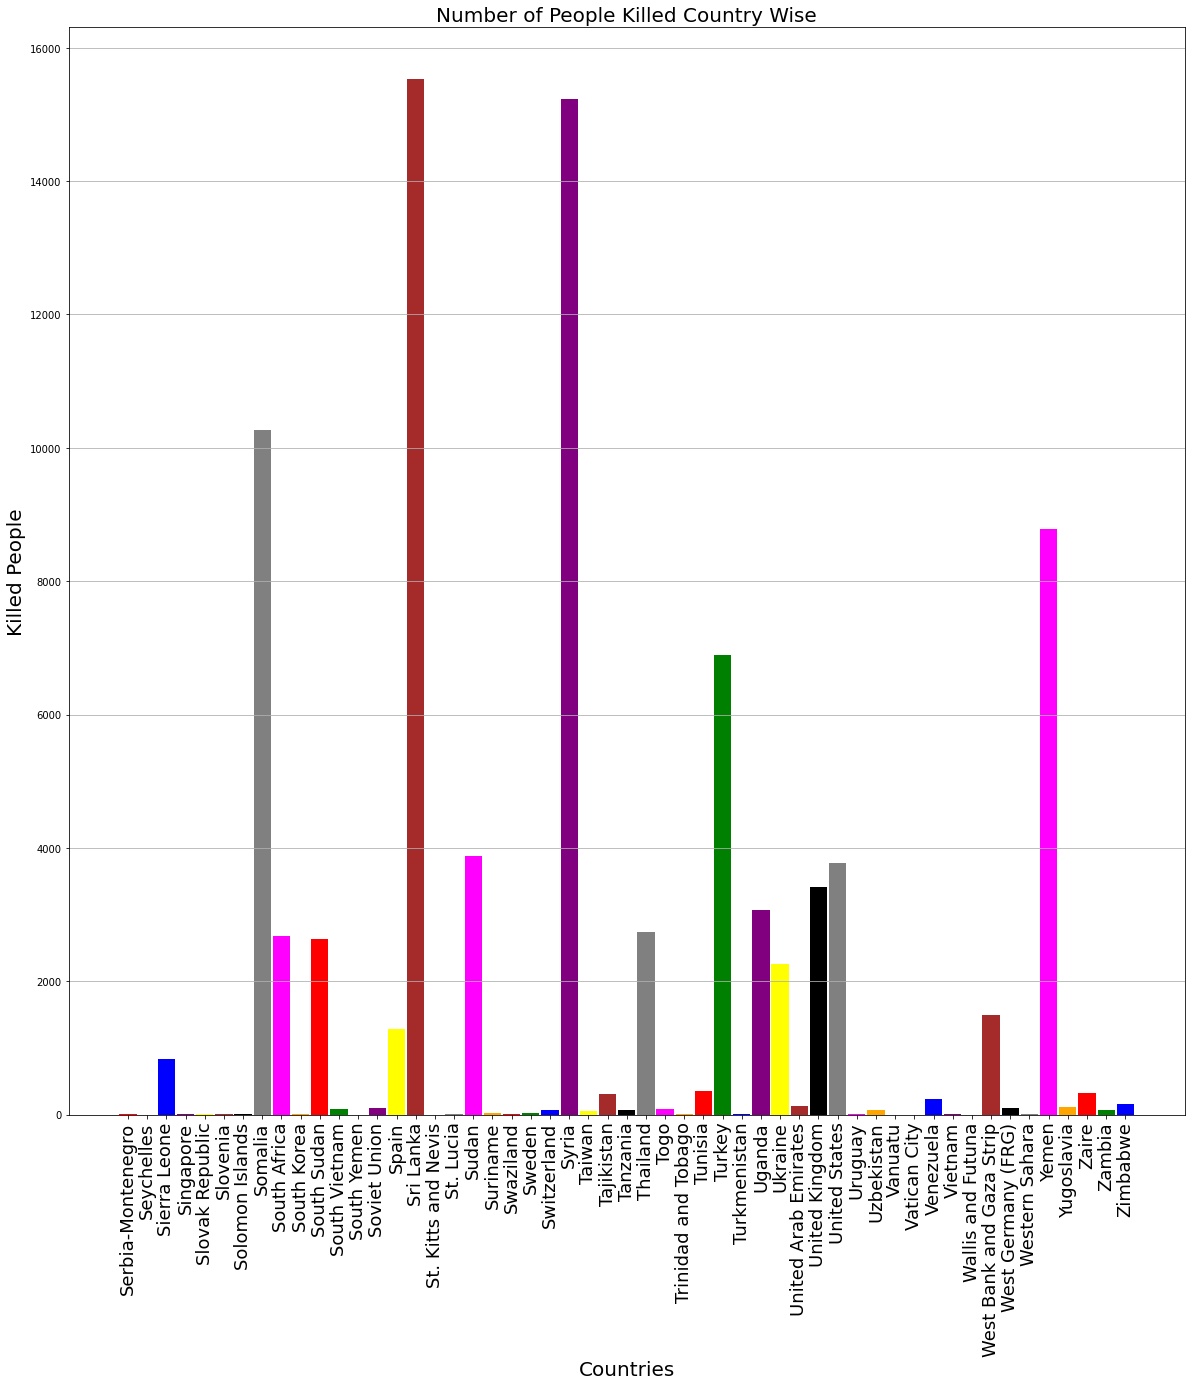

In [77]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']

fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25

plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of People Killed Country Wise', fontsize = 20)
plt.show()

# Observations:
1. Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks.
2. In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries.


# Thank You 